In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import m_e
from astropy.coordinates import Distance
import matplotlib.pyplot as plt
from IPython.display import Image

# import agnpy classes
from agnpy.spectra import PowerLaw
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.compton import SynchrotronSelfCompton
from agnpy.utils.plot import plot_sed, load_mpl_rc

load_mpl_rc()



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# blob properties
R_b = 1e16 * u.cm
V_b = 4 / 3 * np.pi * R_b ** 3
z = Distance(1e27, unit=u.cm).z
delta_D = 10
Gamma = 10
B = 1 * u.G

# electron distribution
W_e = 1e48 * u.Unit("erg")

n_e = PowerLaw.from_total_energy(
    W=W_e, V=V_b, p=2.8, gamma_min=1e2, gamma_max=1e7, mass=m_e
)

blob = Blob(R_b, z, delta_D, Gamma, B, n_e=n_e)

In [3]:
print(blob)

* Spherical emission region
 - R_b (radius of the blob): 1.00e+16 cm
 - t_var (variability time scale): 4.13e-01 d
 - V_b (volume of the blob): 4.19e+48 cm3
 - z (source redshift): 0.07 redshift
 - d_L (source luminosity distance):1.00e+27 cm
 - delta_D (blob Doppler factor): 1.00e+01
 - Gamma (blob Lorentz factor): 1.00e+01
 - Beta (blob relativistic velocity): 9.95e-01
 - theta_s (jet viewing angle): 5.74e+00 deg
 - B (magnetic field tangled to the jet): 1.00e+00 G
 - xi (coefficient for 1st order Fermi acceleration) : 1.00e+00
* electrons energy distribution
 - power law
 - k: 9.27e+06 1 / cm3
 - p: 2.80
 - gamma_min: 1.00e+02
 - gamma_max: 1.00e+07



In [4]:
# we can also print the total electrons number and energy
print(f"total particle number: {blob.N_e_tot:.2e}")
print(f"total energy in electrons: {blob.W_e:.2e}")

total particle number: 5.44e+51
total energy in electrons: 1.00e+48 erg


In [5]:
# as well as the jet power in particles and magnetic fields (see the documentation for more details)
print(f"jet power in particles: {blob.P_jet_ke:.2e}")
print(f"jet power in magnetic field: {blob.P_jet_B:.2e}")

jet power in particles: 4.47e+44 erg / s
jet power in magnetic field: 7.46e+43 erg / s


In [6]:
synch = Synchrotron(blob)
synch_ssa = Synchrotron(blob, ssa=True)

In [7]:
# let us define now a grid of frequencies over which to calculate the synchrotron SED
nu_syn = np.logspace(8, 23) * u.Hz

# let us compute a synchrotron, and a self-absorbed synchrotron SED
synch_sed = synch.sed_flux(nu_syn)
synch_sed_ssa = synch_ssa.sed_flux(nu_syn)

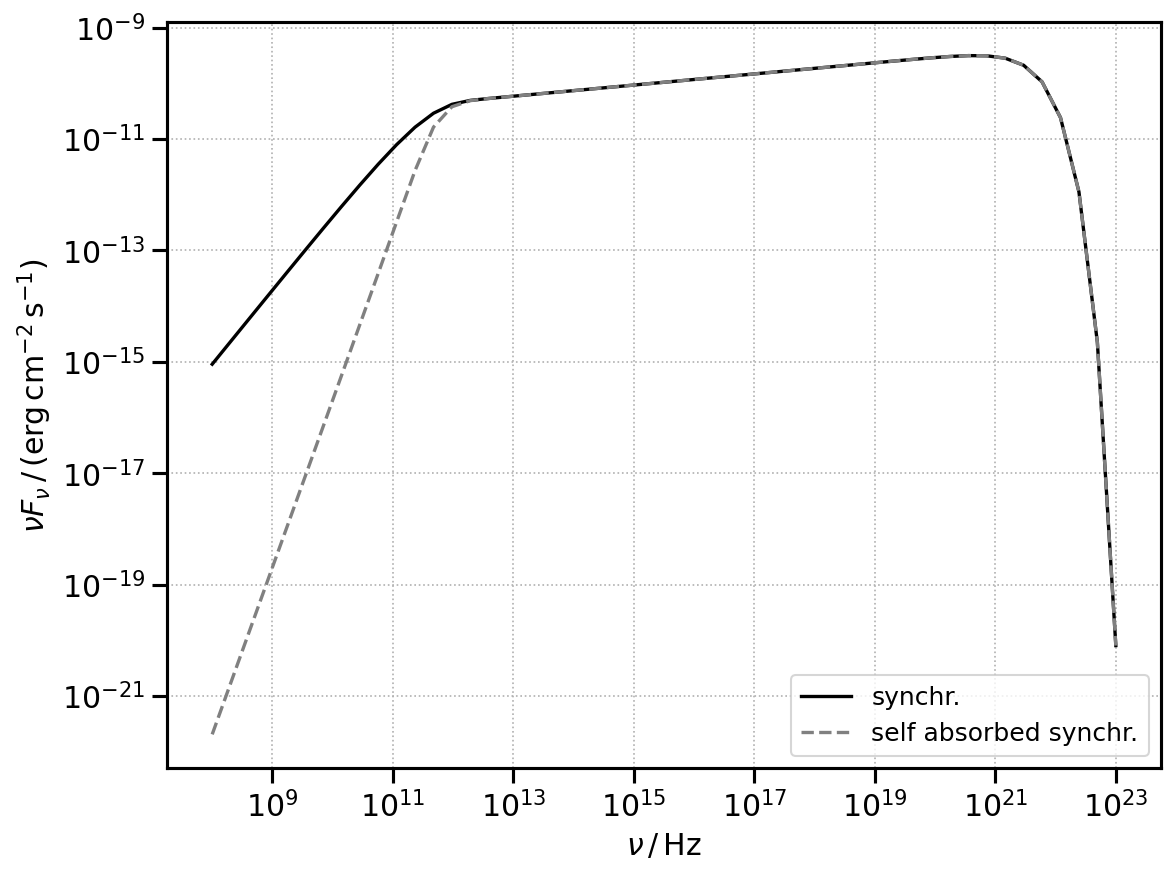

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_sed(nu_syn, synch_sed, ax=ax, color="k", label="synchr.")
plot_sed(
    nu_syn, synch_sed_ssa, ax=ax, ls="--", color="gray", label="self absorbed synchr."
)
plt.show()

In [11]:
# simple ssc
ssc = SynchrotronSelfCompton(blob)

# ssc over a self-absorbed synchrotron spectrum
ssc_ssa = SynchrotronSelfCompton(blob, ssa=True)

In [12]:
nu_ssc = np.logspace(15, 30) * u.Hz
sed_ssc = ssc.sed_flux(nu_ssc)
sed_ssc_ssa = ssc_ssa.sed_flux(nu_ssc)

/usr/local/Caskroom/miniconda/base/lib/python3.12/site-packages/agnpy/synchrotron/synchrotron.py:66: RuntimeWarning: divide by zero encountered in divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)
/usr/local/Caskroom/miniconda/base/lib/python3.12/site-packages/agnpy/synchrotron/synchrotron.py:66: RuntimeWarning: invalid value encountered in divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)


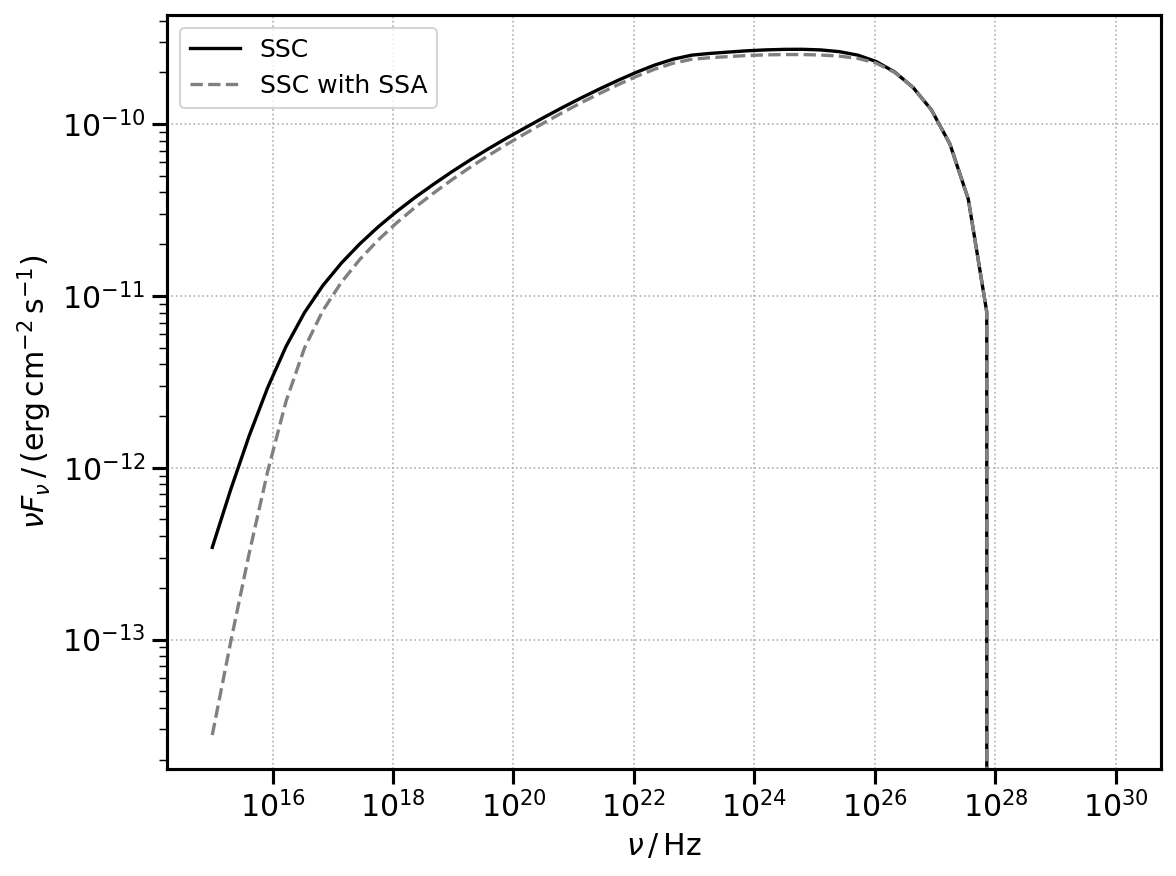

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_sed(nu_ssc, sed_ssc, color="k", label="SSC")
plot_sed(nu_ssc, sed_ssc_ssa, ls="--", color="gray", label="SSC with SSA")
plt.show()

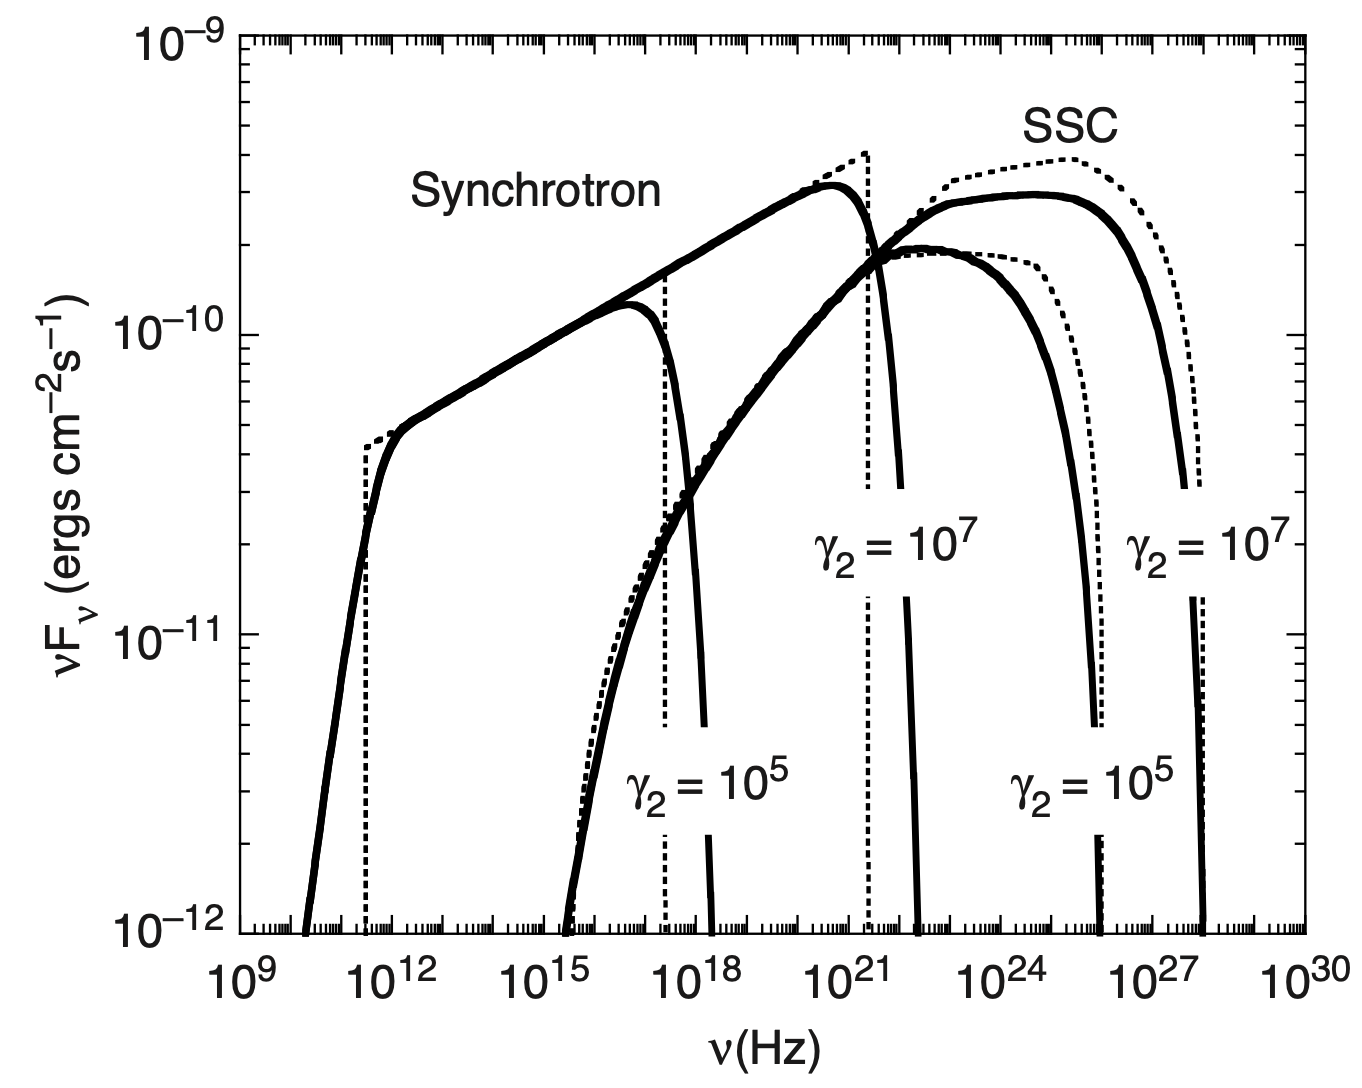

In [17]:
Image("figure_7_4_dermer_2009.png", width=600, height=400)

In [18]:
n_e = PowerLaw.from_total_energy(
    W=W_e, V=V_b, p=2.8, gamma_min=1e2, gamma_max=1e5, mass=m_e
)

blob2 = Blob(R_b, z, delta_D, Gamma, B, n_e=n_e)
synch2 = Synchrotron(blob2)
ssc2 = SynchrotronSelfCompton(blob2)

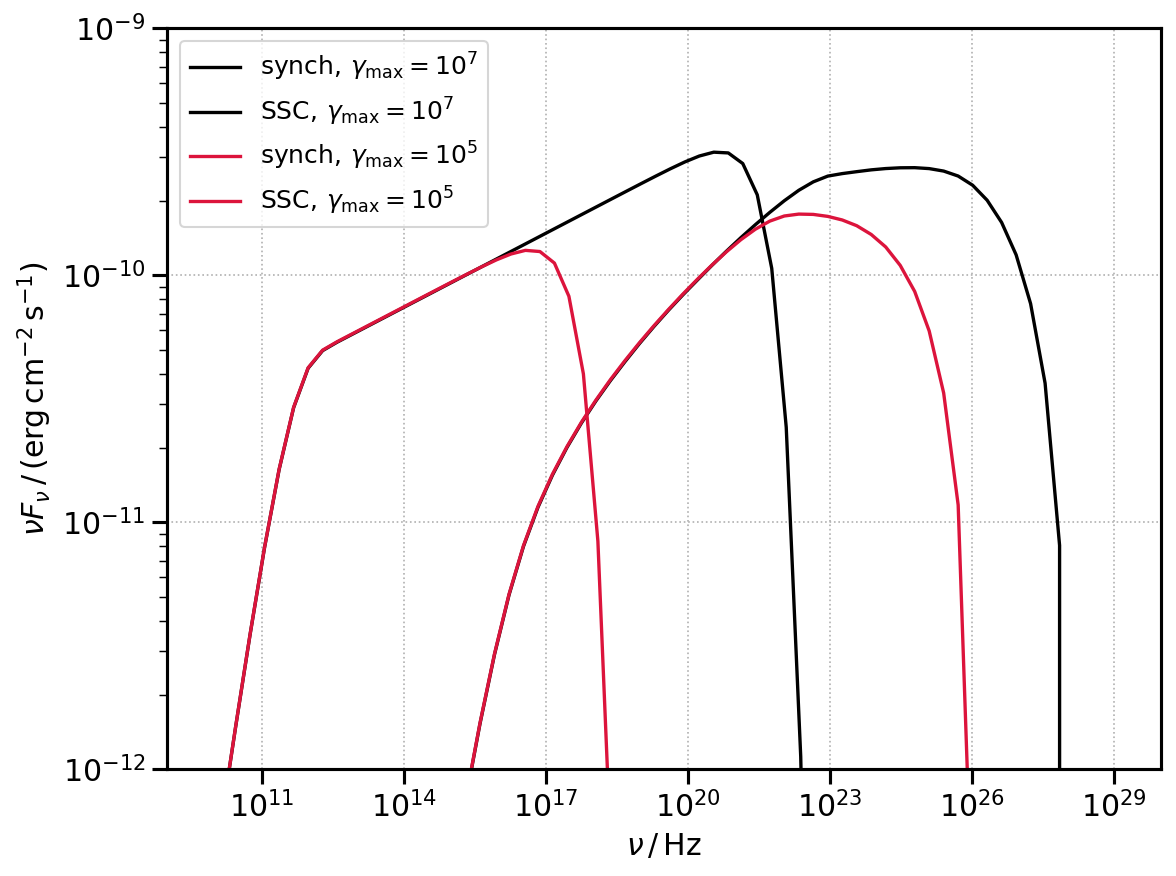

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_sed(
    nu_syn,
    synch.sed_flux(nu_syn),
    color="k",
    label=r"${\rm synch},\,\gamma_{\rm max}=10^7$",
)
plot_sed(
    nu_ssc,
    ssc.sed_flux(nu_ssc),
    color="k",
    label=r"${\rm SSC},\,\gamma_{\rm max}=10^7$",
)
plot_sed(
    nu_syn,
    synch2.sed_flux(nu_syn),
    color="crimson",
    label=r"${\rm synch},\,\gamma_{\rm max}=10^5$",
)
plot_sed(
    nu_ssc,
    ssc2.sed_flux(nu_ssc),
    color="crimson",
    label=r"${\rm SSC},\,\gamma_{\rm max}=10^5$",
)

# select the same x and y range of the figure
plt.xlim([1e9, 1e30])
plt.ylim([1e-12, 1e-9])
plt.show()

In [ ]:
"""
plt.subplot(2,2,1)
plt.title("α = 1, β = 1") 
plt.plot(x,poten(x,1,1), color='purple') 
plt.grid()

plt.subplot(2,2,2)
plt.title("α = 1, β = -1") 
plt.plot(x,poten(x,1,-1), color='purple') 
plt.grid()

plt.subplot(2,2,3)
plt.title("α = -1, β = 1") 
plt.plot(x,poten(x,-1,1), color='purple') 
plt.grid()

plt.subplot(2,2,4) 
plt.title("α = -1, β = -1")
plt.plot(x,poten(x,-1,-1), color='purple') 
plt.grid()

plt.tight_layout()
"""